In [1]:
# Libraries to install
# pip install pystan==2.19.1.1
# pip install prophet==1.0

# From Prophet to NeuralProphet - An Introduction

Prophet is a popular human-in-the-loop forecasting framework build on Stan that allows to create forecasts and visualisations rapidly.

NeuralProphet is an evolution of Prophet that builds on PyTorch and supports even more forecasting components.

Since the interface of Prophet and NeuralProphet differ in various details, we build a wrapper for NeuralProphet that is compatible with many Prophet applications.

## Disclaimer
The Prophet wrapper for NeuralProphet should not be used in production, but is a tool that allows forecasting practitioners using Prophet to quickly evaluate the performance of both frameworks side by side.

## Outline
This tutorial will walk through building a simple forecasting model showing Prophet and NeuralProphet code side-by-side. The code for Prophet comes from the official [Prophet quick-start tutorial](https://facebook.github.io/prophet/docs/quick_start.html#python-api).


### Data Loading

We will use the time series of the log daily page views for the Wikipedia page for Peyton Manning as example for this tutorial. 

In [2]:
import pandas as pd

data_location = "https://raw.githubusercontent.com/ourownstory/neuralprophet-data/main/datasets/"
df = pd.read_csv(data_location + "wp_log_peyton_manning.csv")

### Model initialisation

This is the only line of code for most applications that needs to be changed for the migration using the wrapper.

In [ ]:
from prophet import Prophet
p = Prophet()

from neuralprophet import Prophet
np = Prophet()

### Fit forecasting models

In [ ]:
p.fit(df)

In [ ]:
np.fit(df)

### Expand the dataset into the future

In [6]:
future_p = p.make_future_dataframe(periods=365)
future_p

,ds
0,2007-12-10
1,2007-12-11
2,2007-12-12
3,2007-12-13
4,2007-12-14
...,...
3324,2017-01-15
3325,2017-01-16
3326,2017-01-17
3327,2017-01-18


In [15]:
future_np = np.make_future_dataframe(periods=365)
future_np

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.966% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 99.966% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO:NP.df_utils:Defined frequency is equal to major frequency - D
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column


,ds,y
0,2007-12-10,9.5908
1,2007-12-11,8.5196
2,2007-12-12,8.1837
3,2007-12-13,8.0725
4,2007-12-14,7.8936
...,...,...
3324,2017-01-15,None
3325,2017-01-16,None
3326,2017-01-17,None
3327,2017-01-18,None


### Predict future values

In [ ]:
forecast_p = p.predict(future_p)
forecast_p

In [ ]:
forecast_np = np.predict(future_np)
forecast_np

### Plot the forecasts

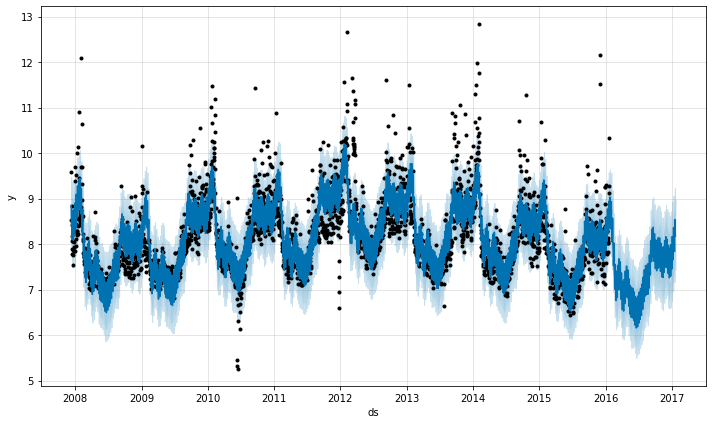

In [11]:
fig1_p = p.plot(forecast_p)

WARNING - (NP.forecaster.plot) - The attributes `uncertainty`, `plot_cap` and `include_legend` are not supported by NeuralProphet


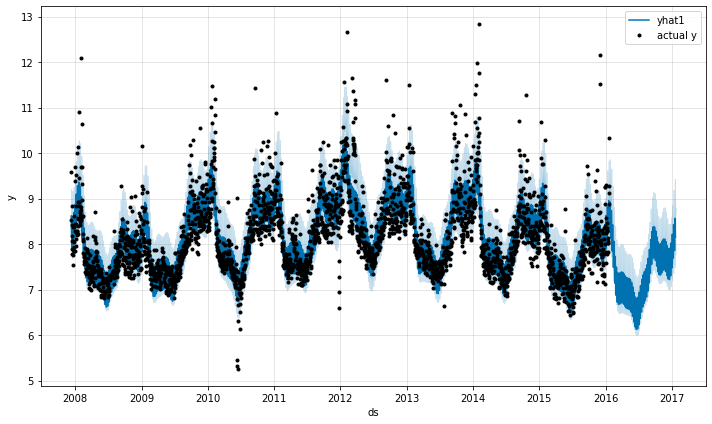

In [12]:
fig1_np = np.plot(forecast_np)

### Plot the forecast components

WARNING - (py.warnings._showwarnmsg) - /Users/karl/git/neural_prophet/venv/lib/python3.8/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)

  components = components.append(new_comp)

WARNING - (py.warnings._showwarnmsg) - /Users/karl/git/neural_prophet/venv/lib/python3.8/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)

  components = components.append(new_comp)



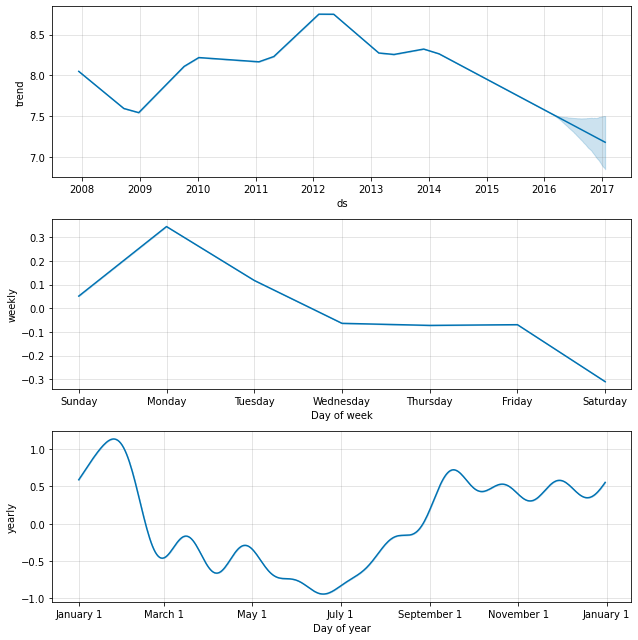

In [13]:
fig2_p = p.plot_components(forecast_p)

WARNING - (NP.forecaster.plot_components) - The attributes `uncertainty`, `plot_cap`, `weekly_start` and `yearly_start` are not supported by NeuralProphet


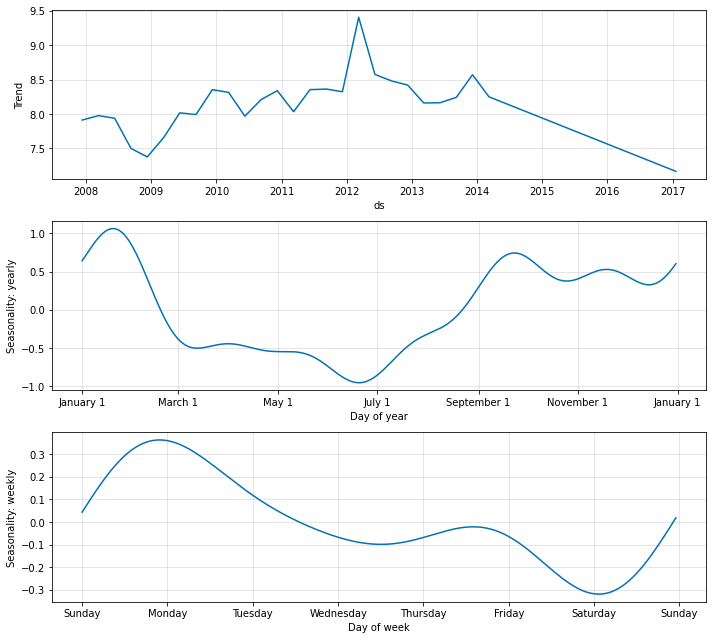

In [14]:
fig2_np = np.plot_components(forecast_np)

### Plot using Ploty

In [13]:
from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(p, forecast_p)

In [ ]:
np.plot(forecast_np, plotting_backend="plotly")